RGB
('R', 'G', 'B')
(225, 225, 3)
(225, 225, 3)


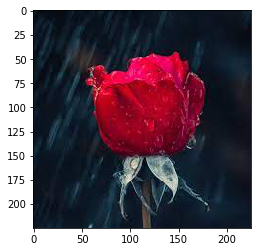

In [12]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import scipy.ndimage.filters
from matplotlib import pyplot as plt
from matplotlib import colors

im = Image.open('sample_data/1024x768/5076506.jpg')
print(im.mode)
print(im.getbands())
m = np.array(im)
print (m.shape)
#m = np.delete(m,0, 2)
#m = np.delete(m,1, 2)
print (m.shape)
h = m.shape[0]
w = m.shape[1]
#m = m.reshape(w,h)

plt.imshow(m, cmap='gray', vmin=0, vmax=255)

[0.6333333  0.6333333  0.6388889  0.6041667  0.6041667  0.6166667
 0.59090906 0.61538464 0.5888889  0.5888889 ]


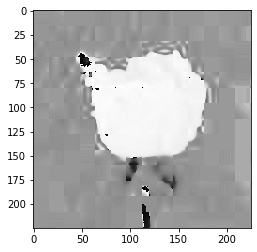

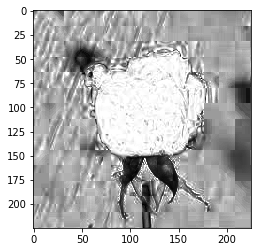

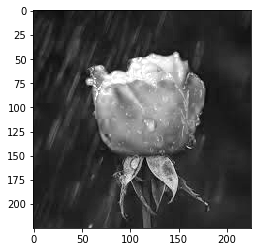

In [13]:

hsvimage =colors.rgb_to_hsv(m)
hue = hsvimage[:,:,0]
sat = hsvimage[:,:,1]
value = hsvimage[:,:,2]

plt.figure()
plt.imshow(hue*255, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(sat*255, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(value, cmap='gray', vmin=0, vmax=255)

In [14]:
normV = value/255

In [18]:
saturated = [(p > 0.2) for p in sat.flatten()]
middleValues = [((p > 0.15) and (p < .95)) for p in normV.flatten()]

In [19]:
hue2 = hue.flatten()[saturated and middleValues]

In [21]:
hist = np.histogram(hue2,bins=20)
print (hist[0])
maxHue = max(hist[0])
print(maxHue)
t = maxHue * 0.05
count = 0
for i in range(20):
    n = hist[0][i]
    if n > t:
        count += 1
print ("COUNT:", count)
feature = 20 - count
print ("FEAUTRE:", feature)


[  146   119    82    62    50    65    32    80   157   276  1381 13299
  1877   413    96    76    47   153  1847  7963]
13299
COUNT: 5
FEAUTRE: 15
